<a href="https://colab.research.google.com/github/themysterysolver/ML-Learn/blob/main/LAB/WEEK_9_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PCA(Principle compound Analaysis)
- Accuracy with and without reduction
- Time complexity analysis

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [75]:
df=pd.read_csv('abalone.csv')

In [76]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [77]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

### Correlation
- finding correlation between 2 columns
- coorelation matrix is bulit with `corr`

In [78]:
ndf=co_df=df.drop(columns=["Sex"])
co_mat=co_df.corr()

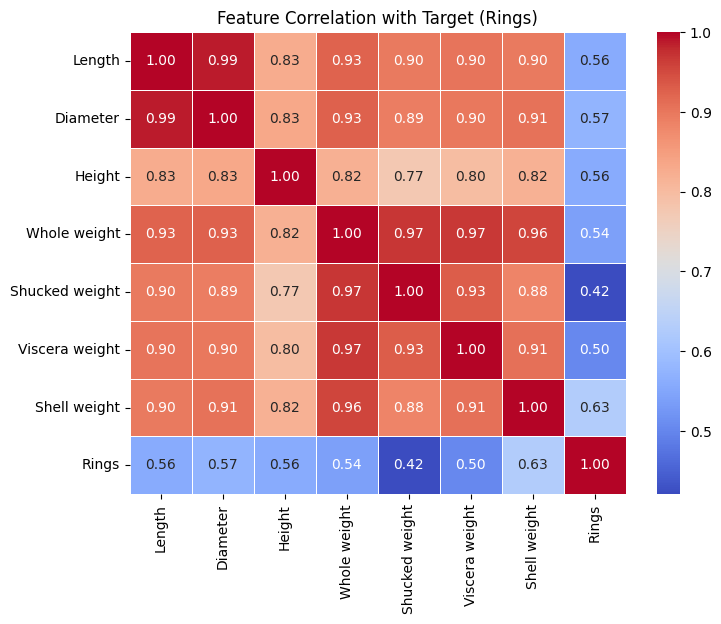

In [79]:
plt.figure(figsize=(8, 6))
sns.heatmap(co_mat, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation with Target (Rings)")
plt.show()

In [80]:
X=ndf.drop(columns=['Rings'])
y=ndf['Rings']
print(X.shape)

(4177, 7)


In [81]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(X)

In [82]:
pca=PCA(n_components=2)
pca_df=pca.fit_transform(scaled_data)

In [83]:
print(pca_df.shape)

(4177, 2)


In [49]:
pca_x=pd.DataFrame(data=pca_df,columns=['PC1','PC2'])

In [50]:
print(pca_x)

           PC1       PC2
0    -1.756019 -0.390532
1    -3.362734 -0.105153
2    -0.482338  0.252055
3    -1.509041  0.207608
4    -3.654006 -0.272819
...        ...       ...
4172  0.801361  0.385426
4173  0.719312 -0.329146
4174  2.167373  0.724010
4175  1.647501 -0.305166
4176  4.894542 -0.705798

[4177 rows x 2 columns]


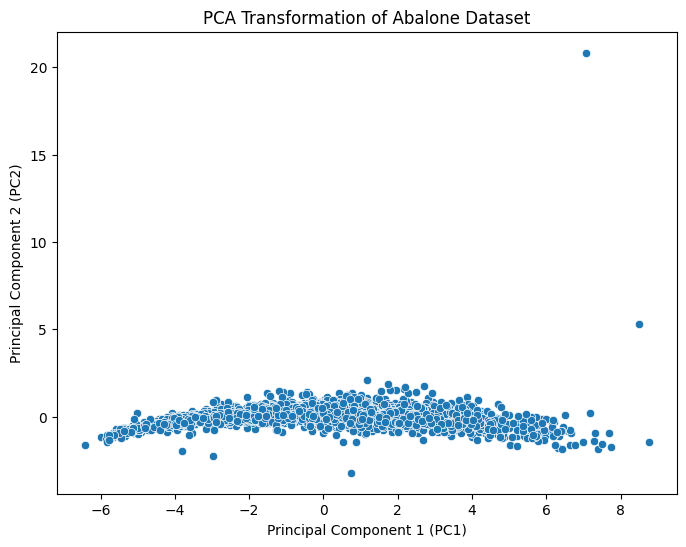

In [51]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_x['PC1'], y=pca_x['PC2'])
plt.xlabel("Principal Component 1 (PC1)")
plt.ylabel("Principal Component 2 (PC2)")
plt.title("PCA Transformation of Abalone Dataset")
plt.show()

### TRAINING WITH PCA DATA

In [52]:
X_train,X_test,y_train,y_test=train_test_split(pca_x,y,test_size=0.2,random_state=42)

In [53]:
model=LinearRegression()

In [54]:
model.fit(X_train,y_train)

LinearRegression()

In [55]:
y_model=model.predict(X_test)

In [57]:
mse=mean_squared_error(y_test,y_model)
r2=r2_score(y_test,y_model)
print(mse,r2)

6.611365484661494 0.38926215225037064


## TESTING WITH ACTUAL DATA

In [69]:
df=pd.read_csv("abalone.csv")
print(df.columns)

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')


In [86]:
print(df.shape)
#df.columns = df.columns.str.strip()
df=df.drop(columns=["Sex"],errors='ignore')
print(df.shape,df.columns)

(4177, 8)
(4177, 8) Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')


In [87]:
X=df.drop(columns=['Rings'])
y=df['Rings']

In [88]:
X_train,X_test,y_train,y_test=train_test_split(X, y,random_state=42)

In [89]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [90]:
model=LinearRegression()

In [91]:
model.fit(X_train,y_train)

LinearRegression()

In [92]:
y_pred=model.predict(X_test)

In [93]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(mse,r2)

4.816317561210927 0.5318227164582684
